In [6]:
# IMPORTING ALL NECESSARY LIBRARIES.

import pandas as pan
import numpy as numy
import seaborn as sb
import matplotlib.pyplot as plot
%matplotlib inline
import missingno as msno
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer

In [8]:
# READING THE DATASET.

data = pan.read_csv('/Users/karankalambuskar/Desktop/24th MAY 23/diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [9]:
#STATISTICAL ANALYSIS OF OUR DATASET.

data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
#MAKING IT TRANSPOSE TO UNDERSTAND IT WELL.

data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [11]:
#CHEKING NOT-NULL VALUES , NUMBER OF COLUMNS , DATA TYPE AND MEMORY USAGE.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
 #False indicates no missing values. True indicates missing values.
    
data.isnull().values.any() 

False

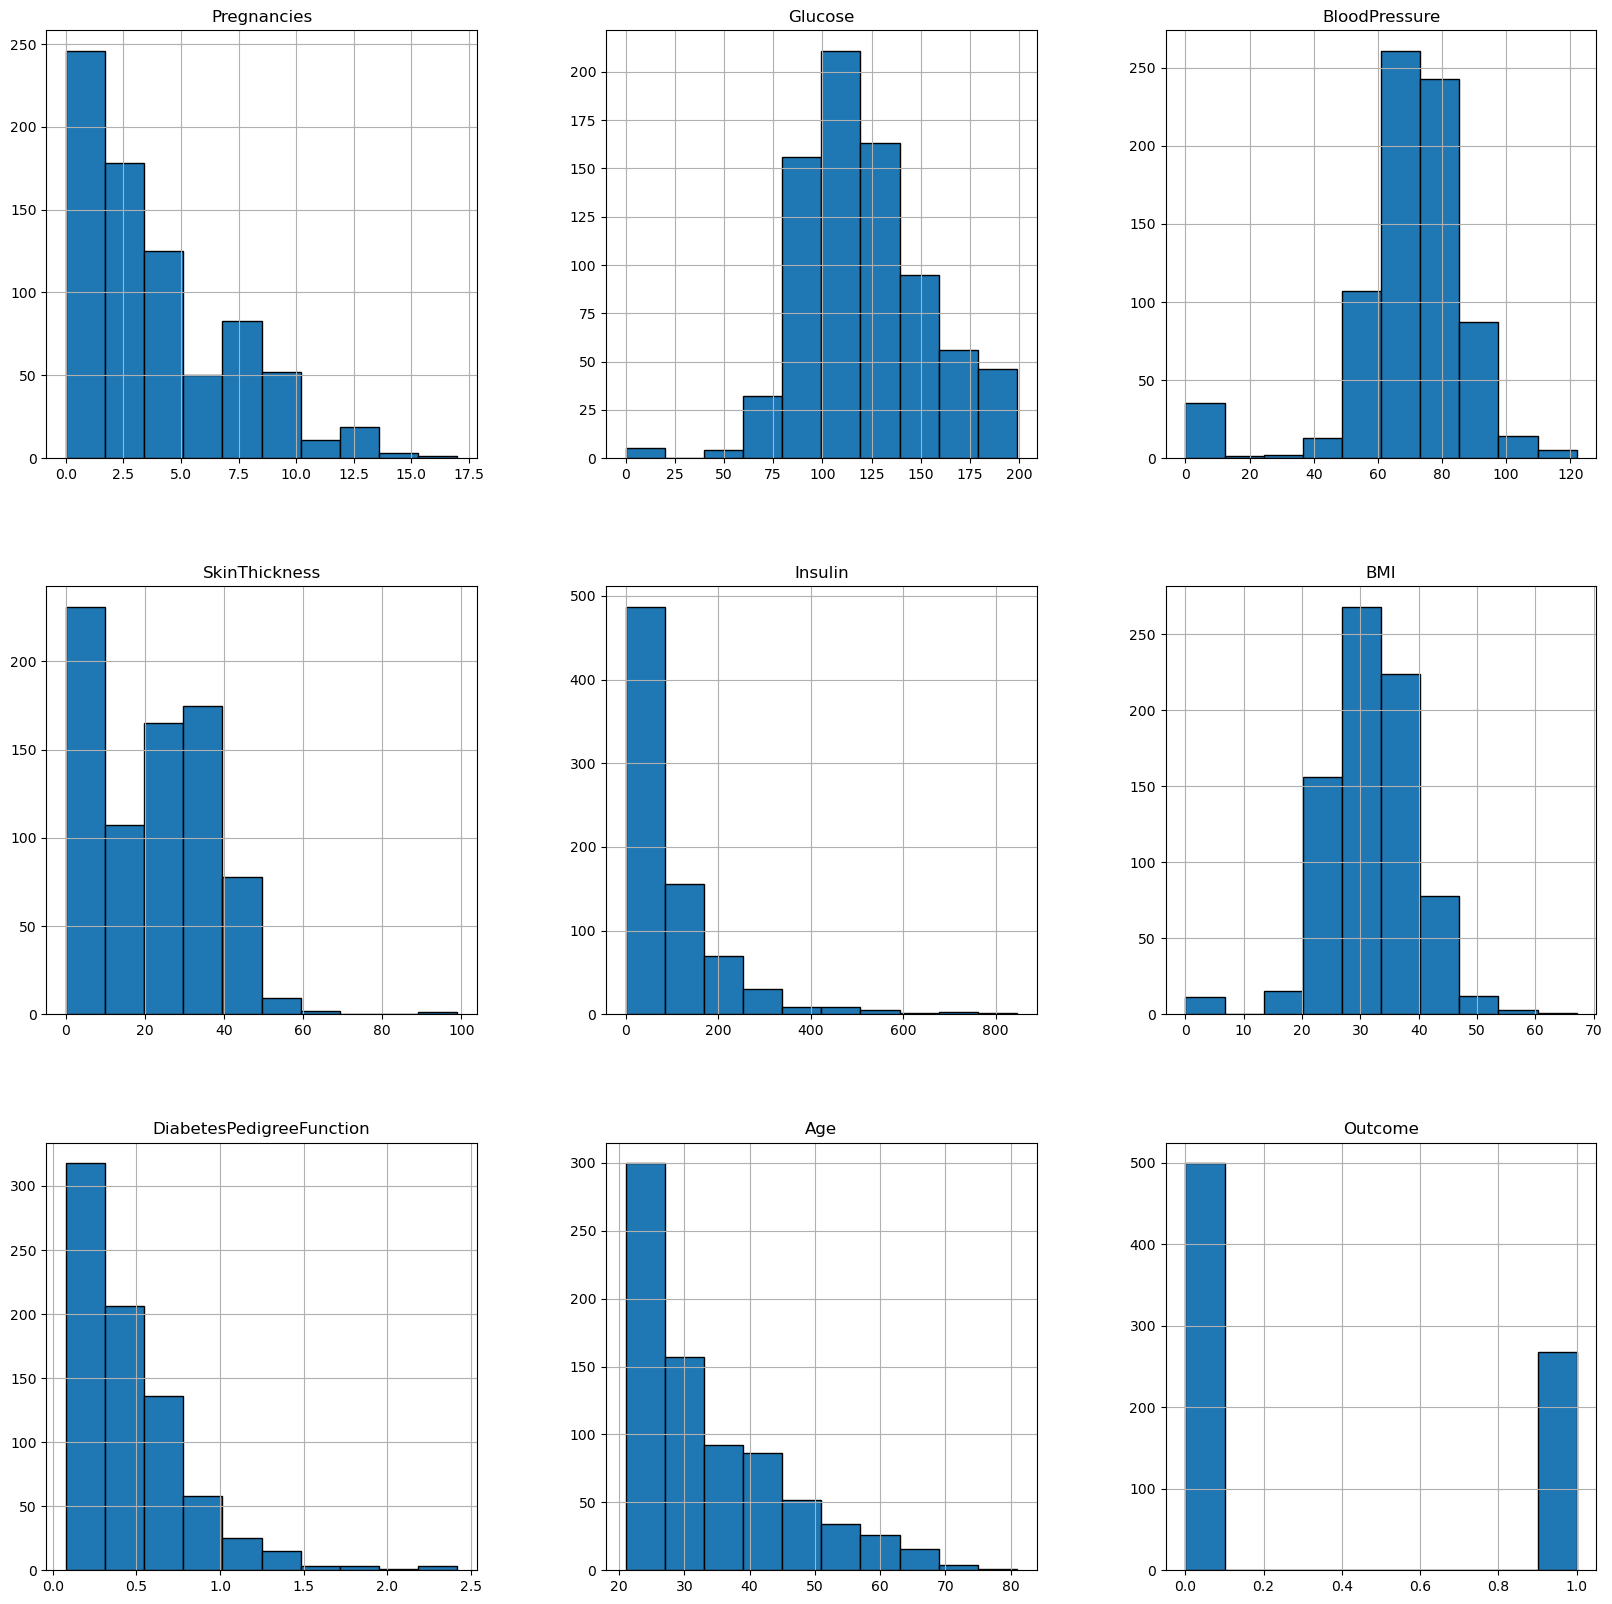

In [13]:
#PLOTTING A HISTOGAM.

data.hist(bins=10,edgecolor = 'Black', figsize=(20, 20))
plot.show()

In [14]:
#CREATING A COPY OF OUR DATASET.

data_copy = data.copy(deep=True)


In [15]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,numy.nan)


In [17]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

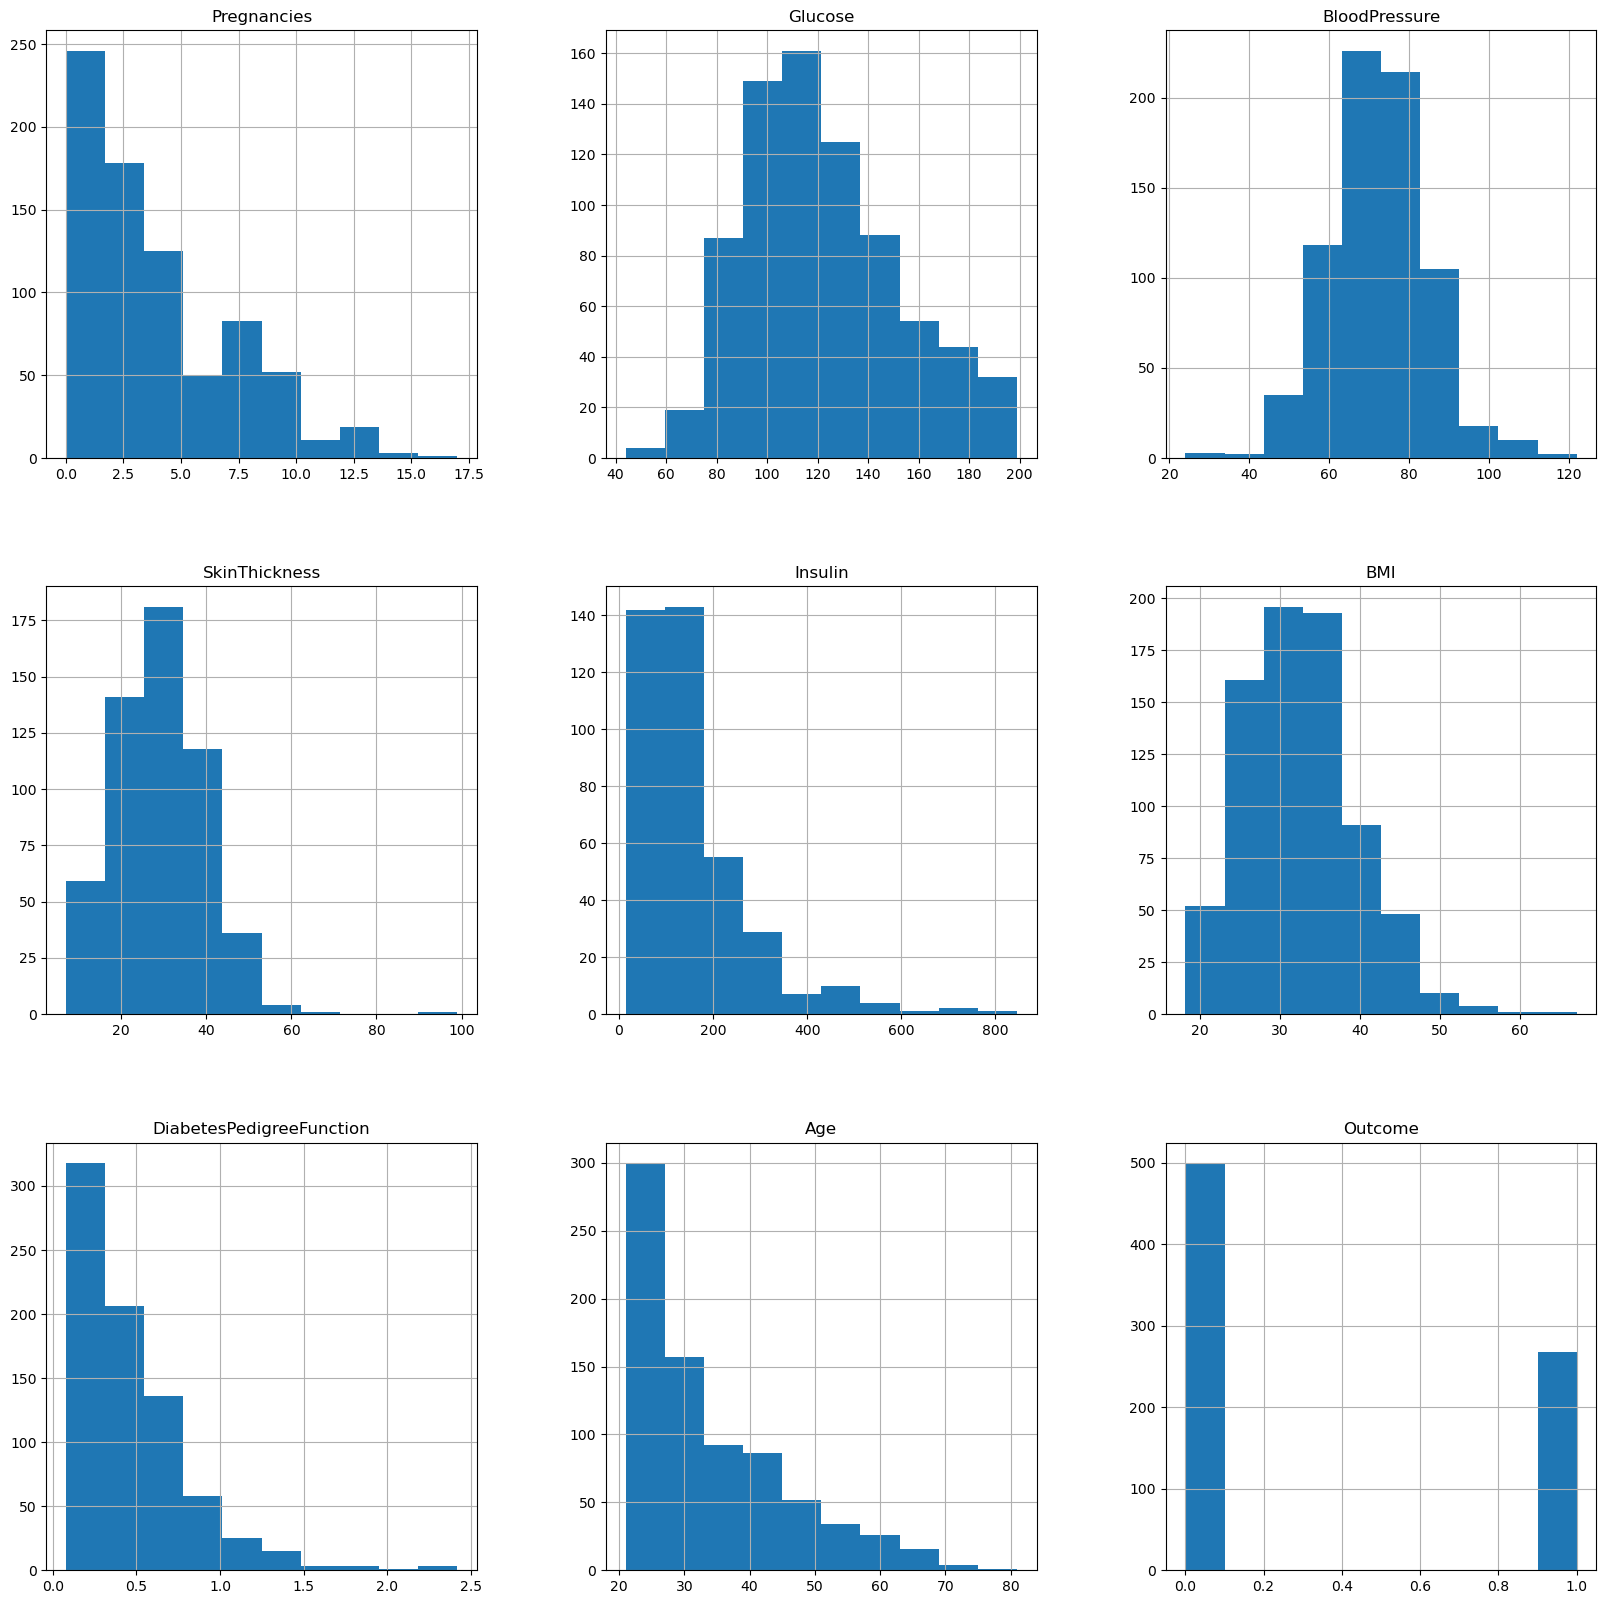

In [19]:
#plotting the HISTOGRAM after removing NaN values.

p = data_copy.hist(figsize=(20,20))

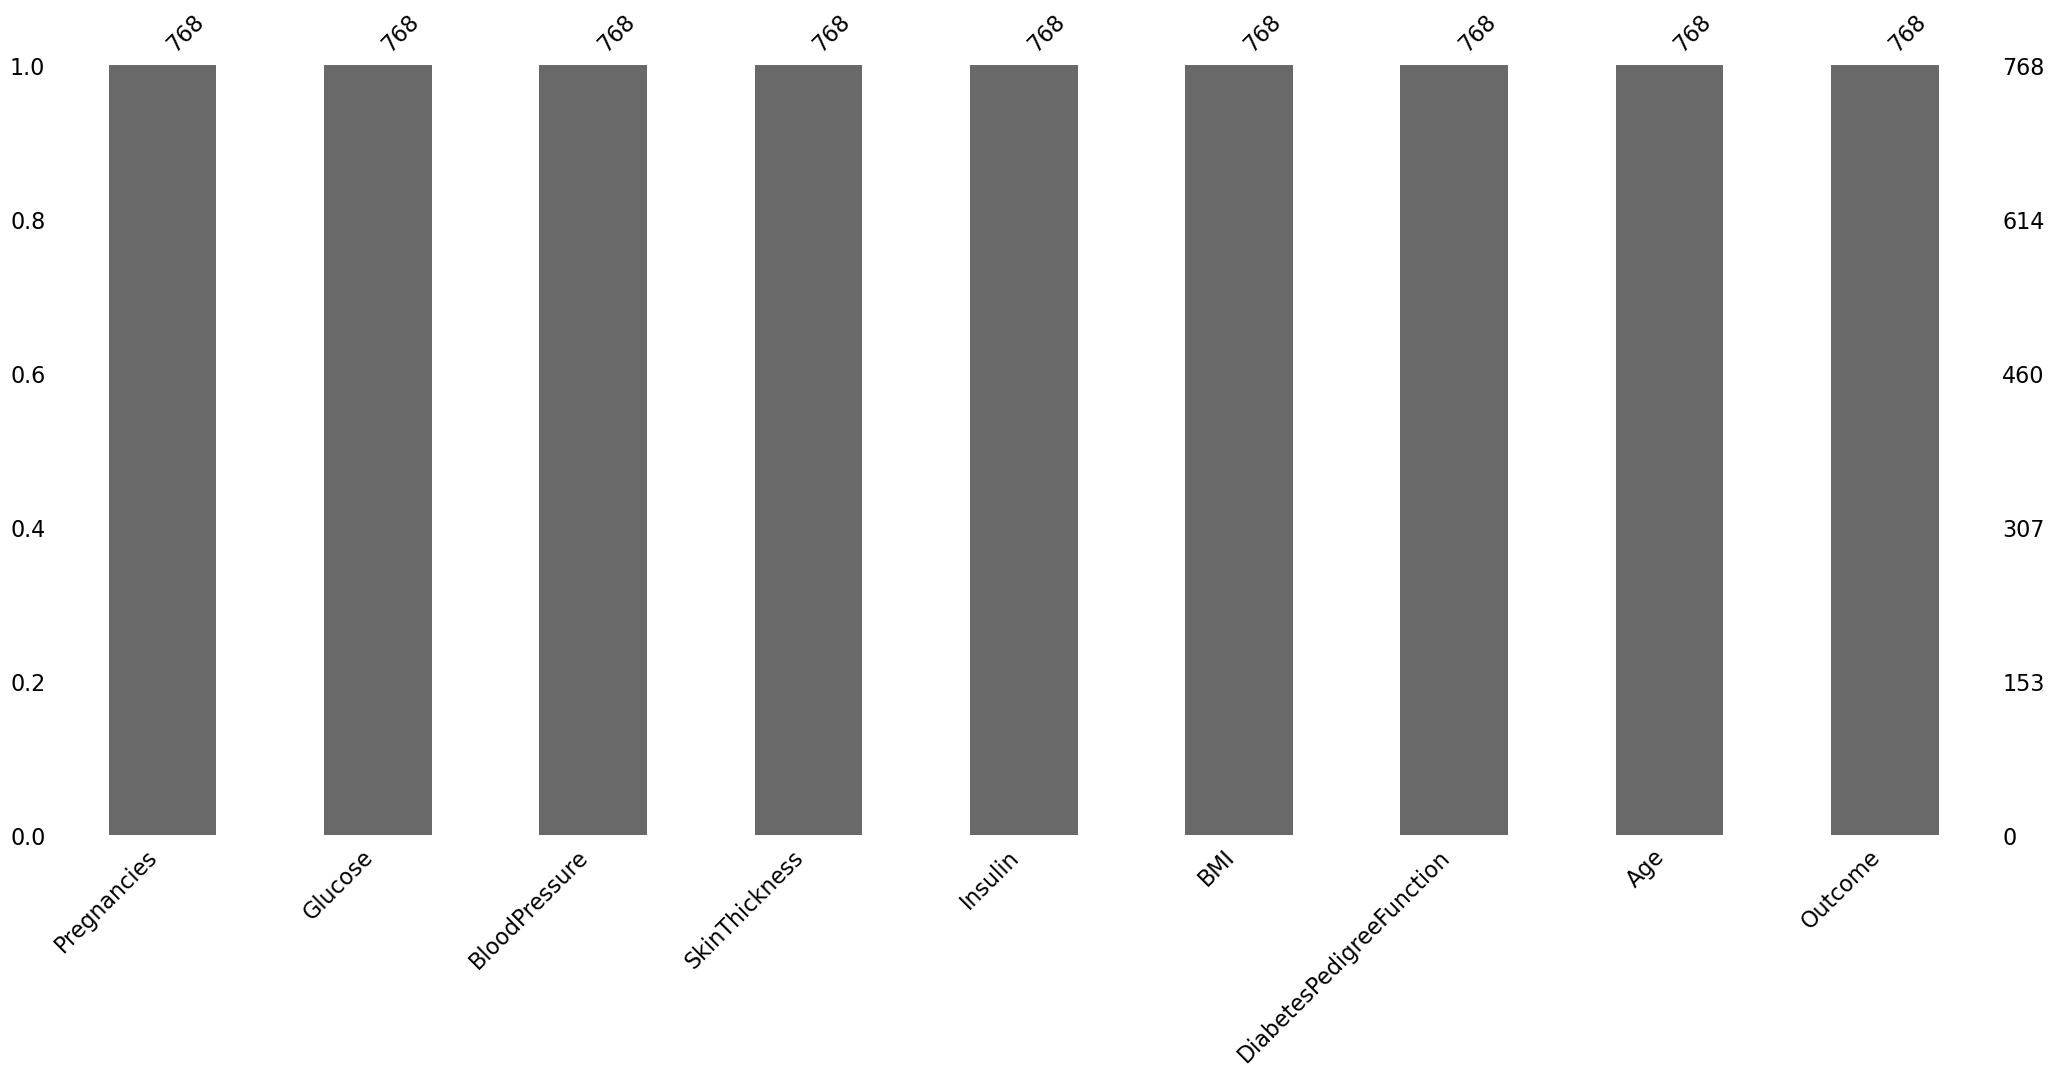

In [20]:
#Plotting Null Count analysis Plot

p = msno.bar(data)

<AxesSubplot: >

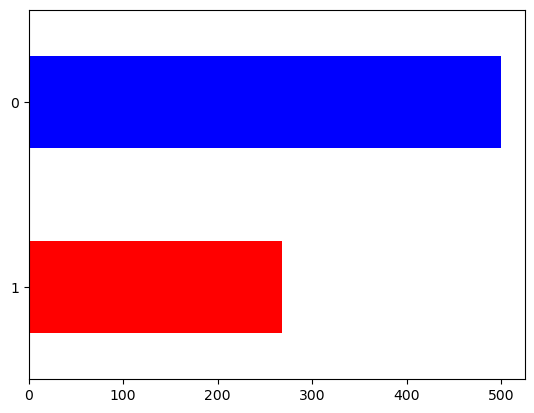

In [21]:
#COUNT OF DIABETIC AND NON DIABETIC PATIENTS.

data_copy.Outcome.value_counts().sort_values().plot(kind = 'barh', color = ['red', 'blue'])

In [22]:
#CORRELATION MATRIX.

data_copy.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128135       0.214178       0.100239   
Glucose                      0.128135  1.000000       0.223192       0.228043   
BloodPressure                0.214178  0.223192       1.000000       0.226839   
SkinThickness                0.100239  0.228043       0.226839       1.000000   
Insulin                      0.082171  0.581186       0.098272       0.184888   
BMI                          0.021719  0.232771       0.289230       0.648214   
DiabetesPedigreeFunction    -0.033523  0.137246      -0.002805       0.115016   
Age                          0.544341  0.267136       0.330107       0.166816   
Outcome                      0.221898  0.494650       0.170589       0.259491   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.082171  0.021719                 -0.033523   
Glucose                   0.581186  0.232771                  0.137246   
BloodPressure             0.098272  0.289230                 -0.002805   
SkinThickness             0.184888  0.648214                  0.115016   
Insulin                   1.000000  0.228050                  0.130395   
BMI                       0.228050  1.000000                  0.155382   
DiabetesPedigreeFunction  0.130395  0.155382                  1.000000   
Age                       0.220261  0.025841                  0.033561   
Outcome                   0.303454  0.313680                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.267136  0.494650  
BloodPressure             0.330107  0.170589  
SkinThickness             0.166816  0.259491  
Insulin                   0.220261  0.303454  
BMI                       0.025841  0.313680  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

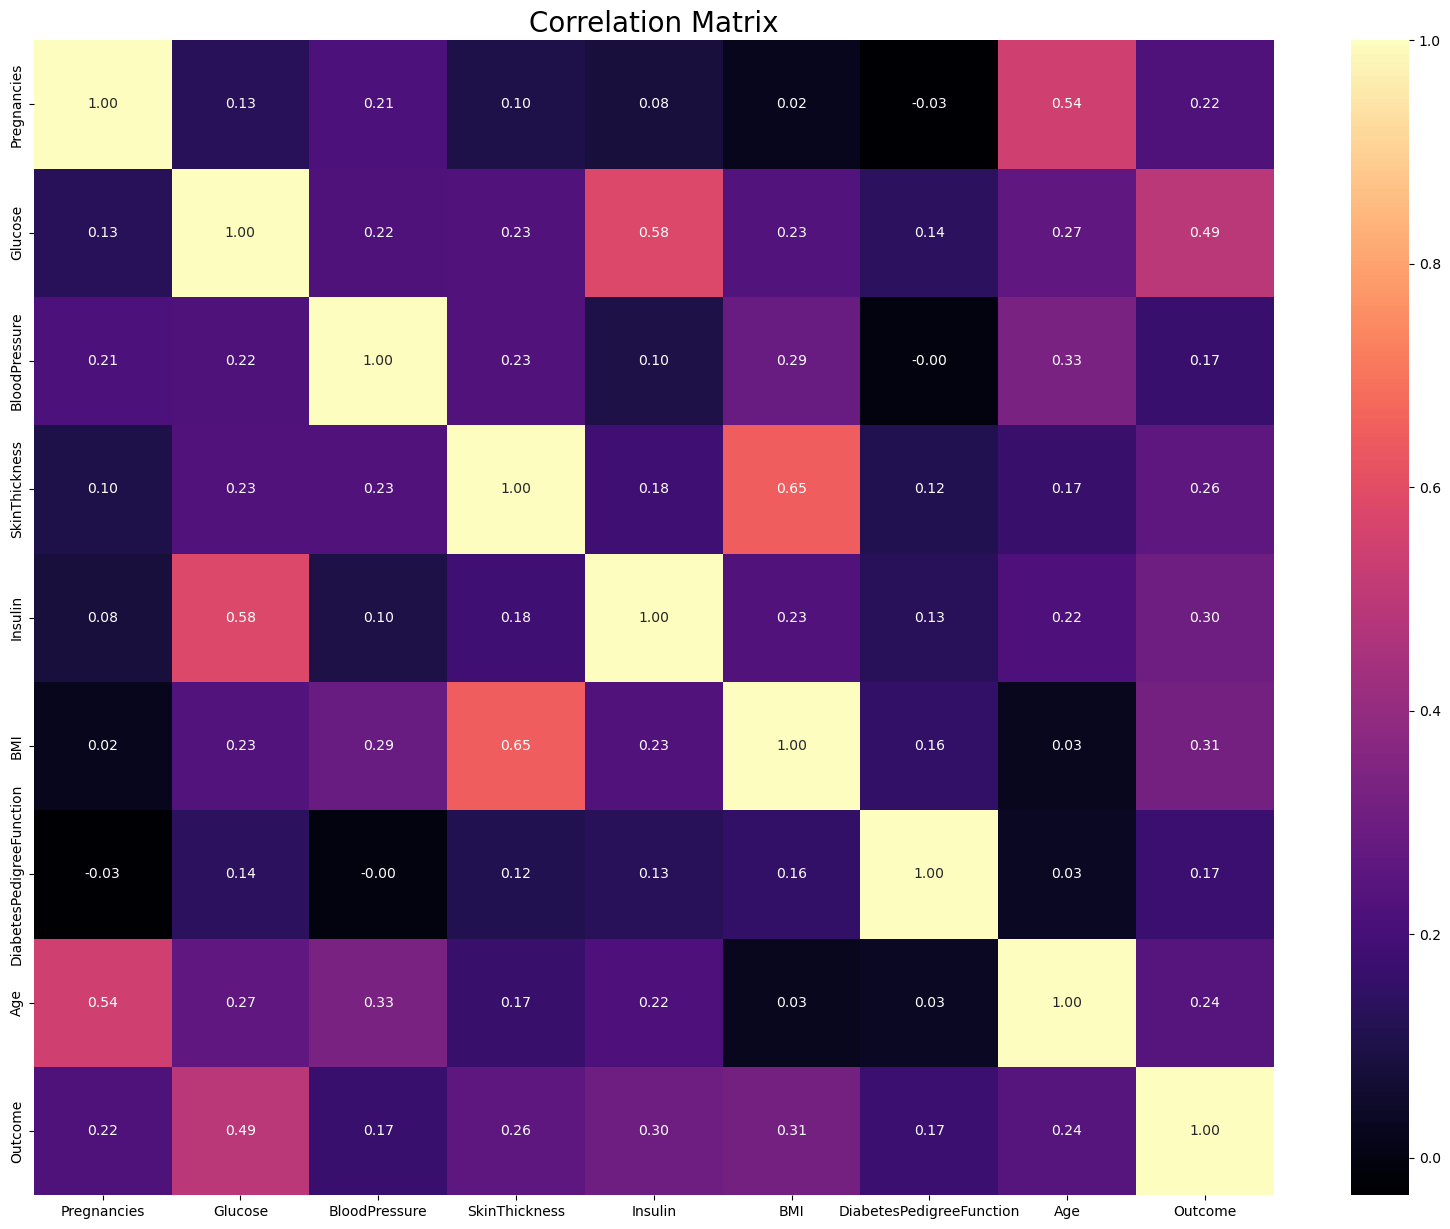

In [23]:
#HEAT MAP OF CORRELATION MATRIX.


fs, axi = plot.subplots(figsize=[20, 15])
sb.heatmap(data_copy.corr(), annot=True, fmt=".2f", ax=axi, cmap="magma")
axi.set_title("Correlation Matrix", fontsize=20)
plot.show()


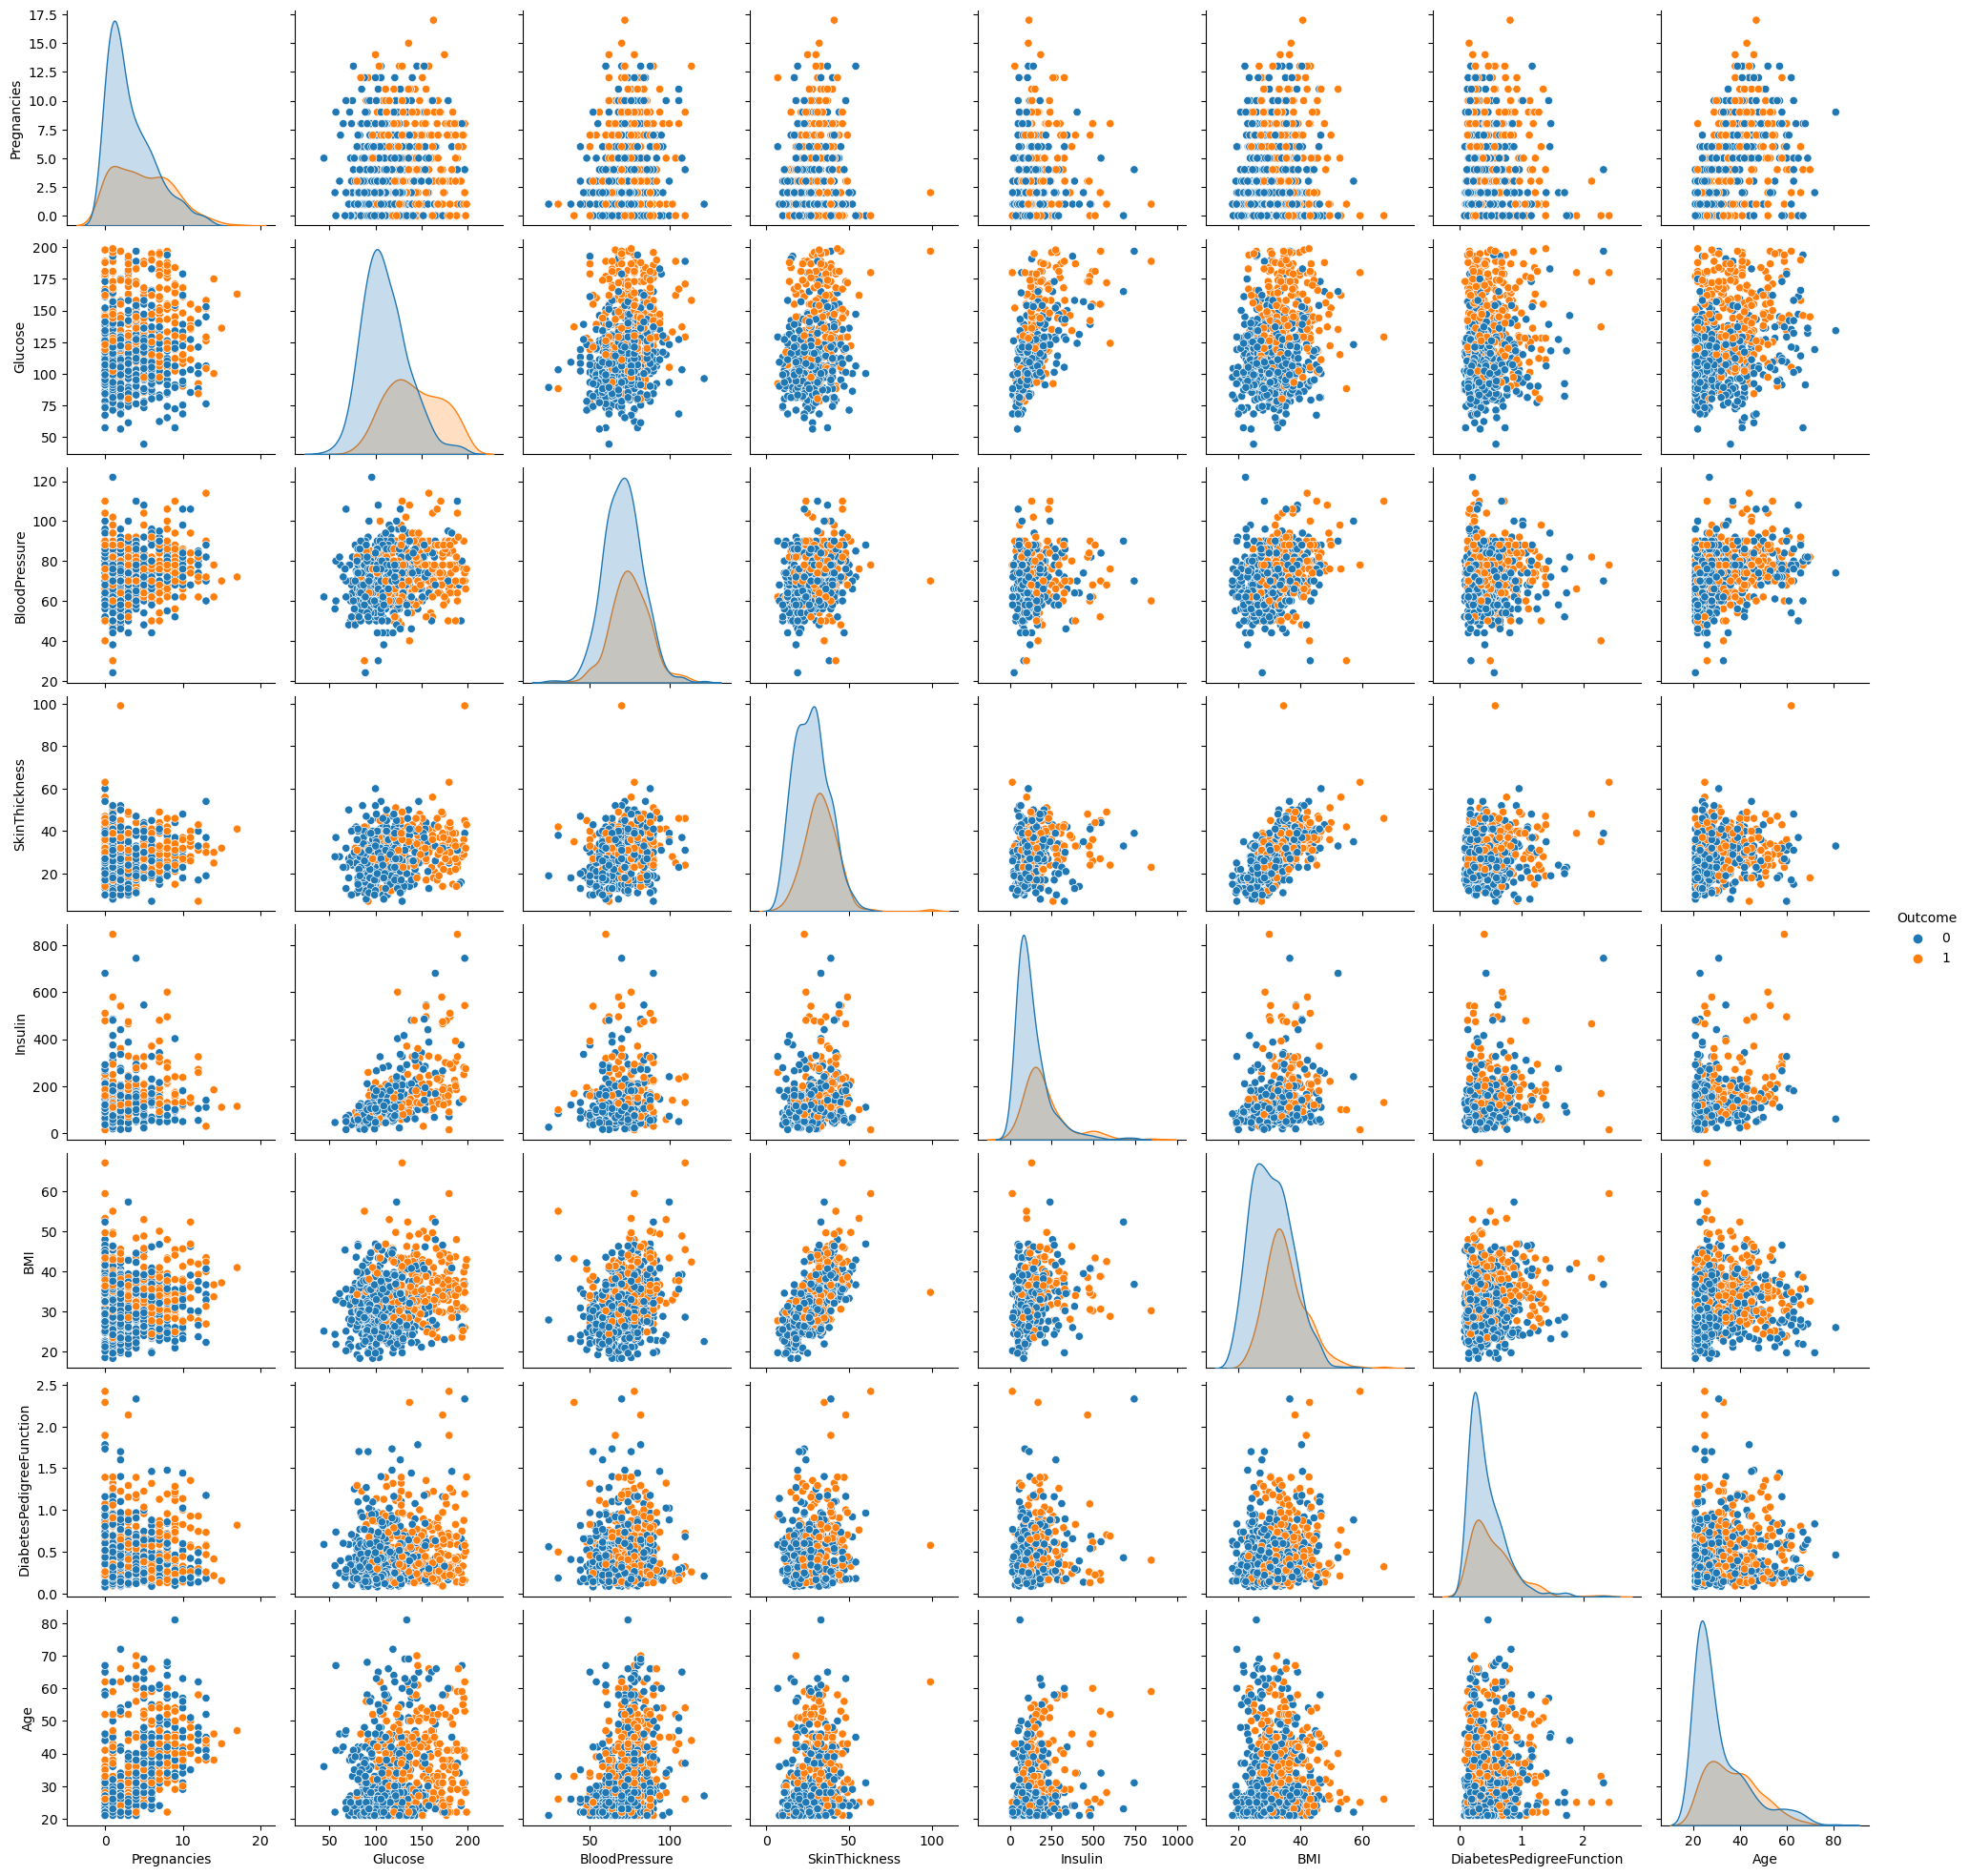

In [24]:
#plotting pair plots for ORIGINAL data.

p = sb.pairplot(data_copy , hue = 'Outcome')

Outlier Obsevation

In [25]:


for featr in data:

    Q1 = data[featr].quantile(0.25)
    Q3 = data[featr].quantile(0.75)
    IQR = Q3 - Q1
    lwr = Q1 - 1.5 * IQR
    upr = Q3 + 1.5 * IQR
    
    if data[(data[featr] > upr)].any(axis=None):
        print(featr, "yes")
    else:
        print(featr, "no")

    

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<AxesSubplot: >

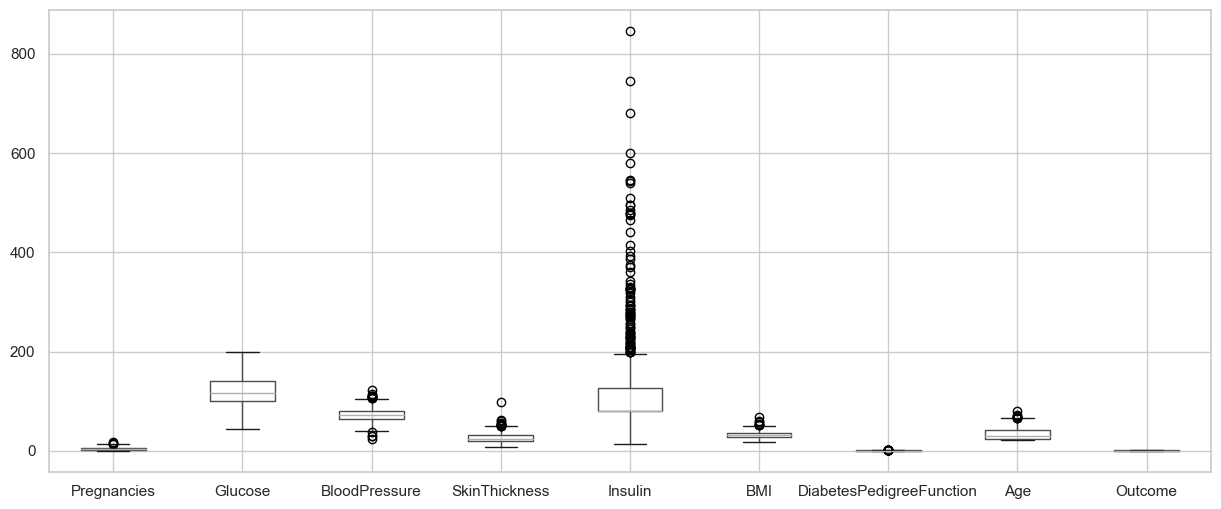

In [26]:
sb.set(style="whitegrid")
data.boxplot(figsize=(15, 6))

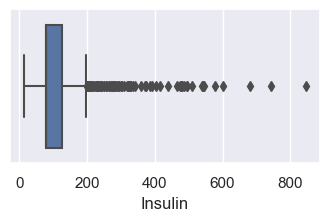

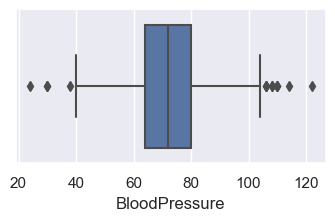

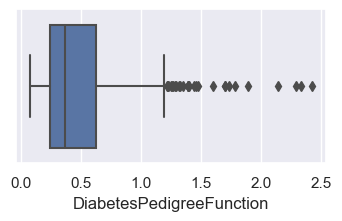

In [27]:
sb.set(style="whitegrid")

sb.set(rc={'figure.figsize': (4, 2)})
sb.boxplot(x=data['Insulin'])
plot.show()
sb.boxplot(x=data['BloodPressure'])
plot.show()
sb.boxplot(x=data['DiabetesPedigreeFunction'])
plot.show()

In [28]:
#Removing Outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

print("---Q1--- \n", Q1)
print("\n---Q3--- \n", Q3)
print("\n---IQR---\n", IQR)

---Q1--- 
 Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000

In [29]:

df_out = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape, df_out.shape

((768, 9), (619, 9))

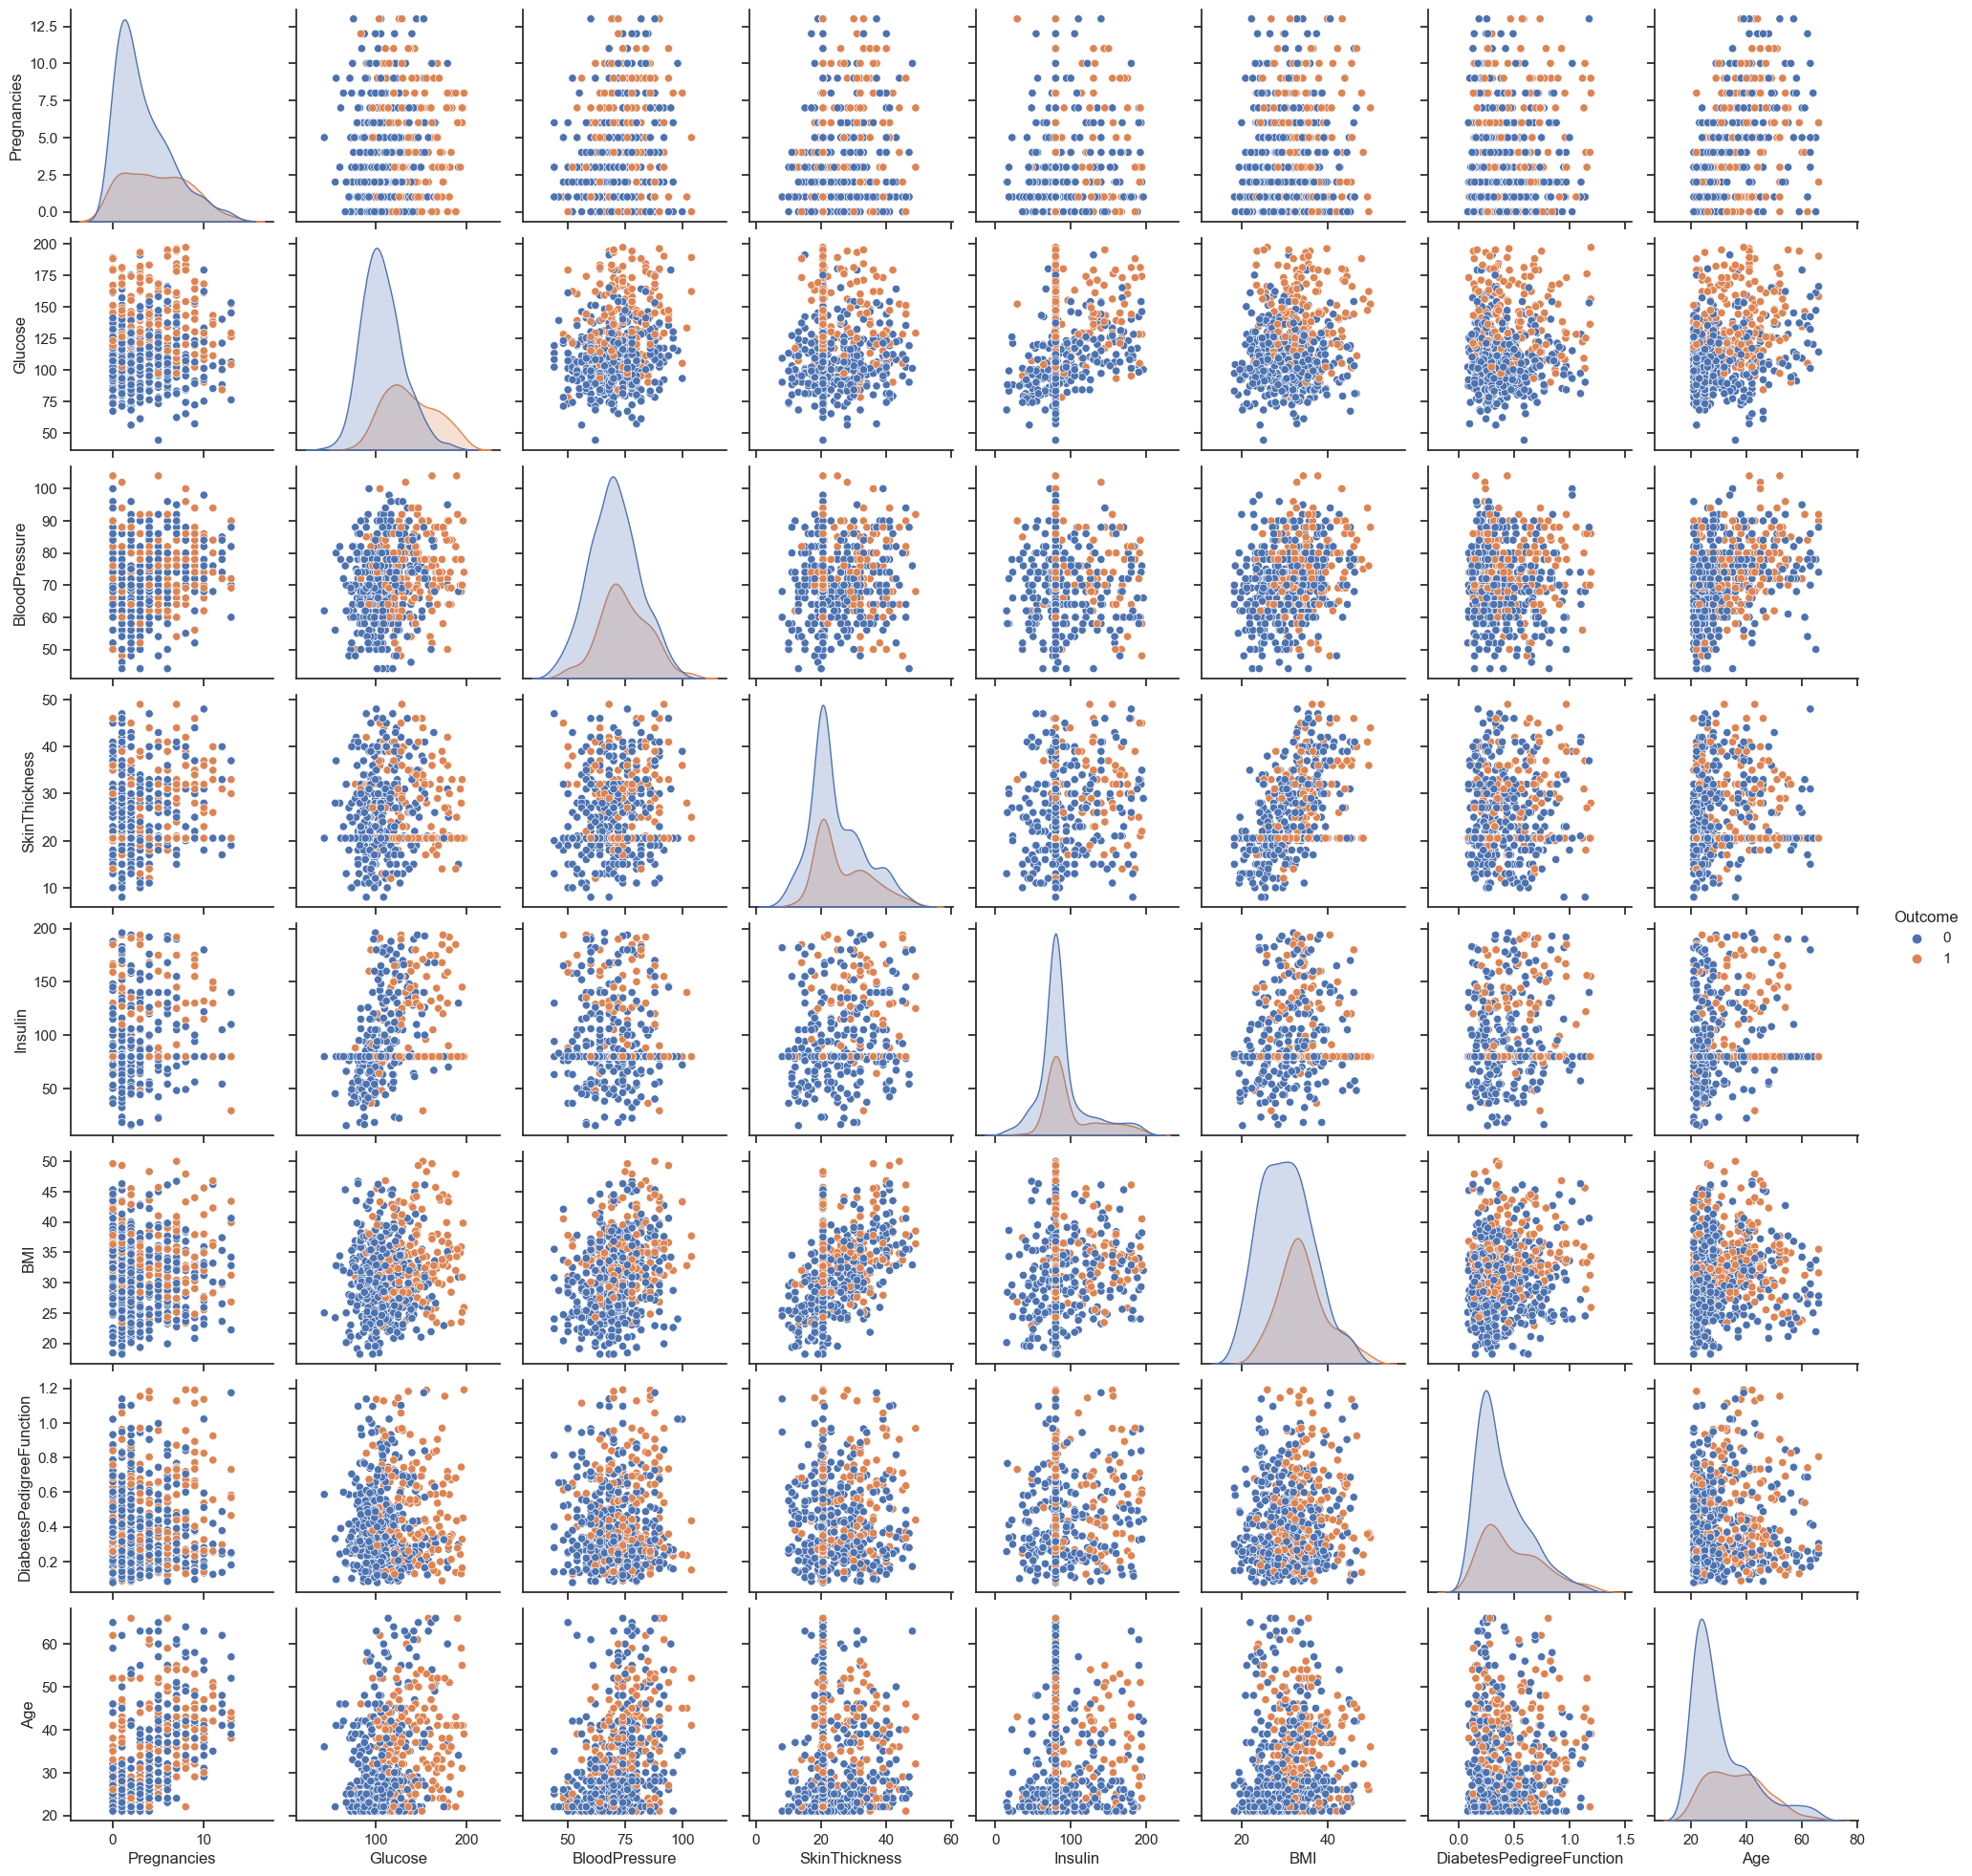

In [30]:
# Scatter matrix after removing outlier
sb.set(style="ticks")
sb.pairplot(df_out, hue="Outcome")
plot.show()

# *TRAINING OUR DATASET*

In [31]:
X = df_out.drop(columns=['Outcome'])
y = df_out['Outcome']

In [32]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, test_X, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state =42)

In [33]:
X_train.shape, test_X.shape, Y_train.shape, Y_test.shape

((495, 8), (124, 8), (495,), (124,))

In [34]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

accurcy = []
roc_val = []

classifr = LogisticRegression()
classifr.fit(X_train, Y_train)
Y_pred = classifr.predict(test_X)

print("Accuracy score : " , (accuracy_score(Y_test, Y_pred)))
print("Recall score: " , (recall_score(Y_test, Y_pred)))
print("Precision score:" , (precision_score(Y_test, Y_pred)))
print("F1 score :" , (f1_score(Y_test, Y_pred)))
print("ROC score :" , (roc_auc_score(Y_test, Y_pred)))

Accuracy score :  0.8548387096774194
Recall score:  0.7666666666666667
Precision score: 0.6764705882352942
F1 score : 0.71875
ROC score : 0.824822695035461


/Users/karankalambuskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Support Vector Machine
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
Y_pred = classifr.predict(test_X)

print("Accuracy score : " , (accuracy_score(Y_test, Y_pred)))
print("Recall score: " , (recall_score(Y_test, Y_pred)))
print("Precision score:" , (precision_score(Y_test, Y_pred)))
print("F1 score :" , (f1_score(Y_test, Y_pred)))
print("ROC score :" , (roc_auc_score(Y_test, Y_pred)))

Accuracy score :  0.8548387096774194
Recall score:  0.7666666666666667
Precision score: 0.6764705882352942
F1 score : 0.71875
ROC score : 0.824822695035461


In [36]:
# K-NEAREST NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier

classifr = KNeighborsClassifier(n_neighbors=3)
classifr.fit(X_train, Y_train)
Y_pred = classifr.predict(test_X)

print("Accuracy score : " , (accuracy_score(Y_test, Y_pred)))
print("Recall score: " , (recall_score(Y_test, Y_pred)))
print("Precision score:" , (precision_score(Y_test, Y_pred)))
print("F1 score :" , (f1_score(Y_test, Y_pred)))
print("ROC score :" , (roc_auc_score(Y_test, Y_pred)))

Accuracy score :  0.7903225806451613
Recall score:  0.6
Precision score: 0.5625
F1 score : 0.5806451612903225
ROC score : 0.7255319148936171


In [37]:
# Random forest CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

classifr = RandomForestClassifier()
classifr.fit(X_train, Y_train)

Y_pred = classifr.predict(test_X)

print("Accuracy score : " , (accuracy_score(Y_test, Y_pred)))
print("Recall score: " , (recall_score(Y_test, Y_pred)))
print("Precision score:" , (precision_score(Y_test, Y_pred)))
print("F1 score :" , (f1_score(Y_test, Y_pred)))
print("ROC score :" , (roc_auc_score(Y_test, Y_pred)))

Accuracy score :  0.8548387096774194
Recall score:  0.7
Precision score: 0.7
F1 score : 0.7
ROC score : 0.8021276595744681


In [38]:
# Naive Bayes Theorem

from sklearn.naive_bayes import GaussianNB

classifr = GaussianNB()
classifr.fit(X_train, Y_train)
Y_pred = classifr.predict(test_X)

print("Accuracy score : " , (accuracy_score(Y_test, Y_pred)))
print("Recall score: " , (recall_score(Y_test, Y_pred)))
print("Precision score:" , (precision_score(Y_test, Y_pred)))
print("F1 score :" , (f1_score(Y_test, Y_pred)))
print("ROC score :" , (roc_auc_score(Y_test, Y_pred)))



Accuracy score :  0.8306451612903226
Recall score:  0.7666666666666667
Precision score: 0.6216216216216216
F1 score : 0.6865671641791045
ROC score : 0.8088652482269503


In [39]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.2)
gbc.fit(X_train, Y_train)
Y_pred = classifr.predict(test_X)


print("Accuracy score : " , (accuracy_score(Y_test, Y_pred)))
print("Recall score: " , (recall_score(Y_test, Y_pred)))
print("Precision score:" , (precision_score(Y_test, Y_pred)))
print("F1 score :" , (f1_score(Y_test, Y_pred)))
print("ROC score :" , (roc_auc_score(Y_test, Y_pred)))



Accuracy score :  0.8306451612903226
Recall score:  0.7666666666666667
Precision score: 0.6216216216216216
F1 score : 0.6865671641791045
ROC score : 0.8088652482269503


# HYPER PARAMETER TUNING ON GRADIENT BOOSTING ALGORITHM.

In [41]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,0.2,1,10,100]
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5,scoring = "accuracy")
grid_result = cv.fit(X_train,Y_train)

In [42]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
pan.concat([pan.DataFrame(grid_result.cv_results_["params"]),pan.DataFrame(grid_result.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

Best: 0.745455 using {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}


learning_rate  max_depth  n_estimators  Accuracy
0             0.01          1             5  0.670707
1             0.01          1            50  0.670707
2             0.01          1           250  0.741414
3             0.01          1           500  0.745455
4             0.01          3             5  0.670707
..             ...        ...           ...       ...
115         100.00          7           500  0.587879
116         100.00          9             5  0.678788
117         100.00          9            50  0.614141
118         100.00          9           250  0.606061
119         100.00          9           500  0.620202

[120 rows x 4 columns]

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01 ,max_depth = 1)
gbc.fit(X_train, Y_train)
Y_pred = classifr.predict(test_X)


print("Accuracy score : " , (accuracy_score(Y_test, Y_pred)))
print("Recall score: " , (recall_score(Y_test, Y_pred)))
print("Precision score:" , (precision_score(Y_test, Y_pred)))
print("F1 score :" , (f1_score(Y_test, Y_pred)))
print("ROC score :" , (roc_auc_score(Y_test, Y_pred)))



Accuracy score :  0.8306451612903226
Recall score:  0.7666666666666667
Precision score: 0.6216216216216216
F1 score : 0.6865671641791045
ROC score : 0.8088652482269503


# HYPER PARAMETER TUNING ON Random Forest Classifier.

In [48]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_result = rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/karankalambuskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [49]:
print("Best: %f using %s" % (rf_result.best_score_, rf_result.best_params_))
pan.concat([pan.DataFrame(rf_result.cv_results_["params"]),pan.DataFrame(rf_result.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

Best: 0.771717 using {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}


n_estimators  min_samples_split  min_samples_leaf max_features  max_depth  \
0          1000                 10                 1         sqrt         70   
1          1600                 10                 4         auto         90   
2           200                 10                 2         sqrt         50   
3          1000                  2                 2         auto         80   
4           200                 10                 2         auto         70   
5          1200                  5                 1         auto         70   
6           600                 10                 4         sqrt        100   
7           600                  2                 2         auto         70   
8          1800                  5                 1         auto        100   
9          2000                  2                 1         auto         20   

   bootstrap  Accuracy  
0      False  0.755556  
1      False  0.753535  
2       True  0.769697  
3       True  0.771717  
4       True  0.769697  
5       True  0.765657  
6      False  0.755556  
7      False  0.743434  
8       True  0.769697  
9      False  0.749495

In [51]:
from sklearn.ensemble import RandomForestClassifier

classifr = RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 2, max_features= 'auto', max_depth= 80, bootstrap= True)
classifr.fit(X_train, Y_train)

Y_pred = classifr.predict(test_X)

print("Accuracy score : " , (accuracy_score(Y_test, Y_pred)))
print("Recall score: " , (recall_score(Y_test, Y_pred)))
print("Precision score:" , (precision_score(Y_test, Y_pred)))
print("F1 score :" , (f1_score(Y_test, Y_pred)))
print("ROC score :" , (roc_auc_score(Y_test, Y_pred)))

/Users/karankalambuskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy score :  0.8629032258064516
Recall score:  0.7666666666666667
Precision score: 0.696969696969697
F1 score : 0.7301587301587302
ROC score : 0.8301418439716312


# CALCULATING THE ACCURACY USING MACHINE LEARNING PIPELINE.


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
pipeline_lr  = Pipeline([('scalar1',StandardScaler()),
                         ('lr_classifier',LogisticRegression())])

pipeline_knn = Pipeline([('scalar2',StandardScaler()),
                          ('knn_classifier',KNeighborsClassifier())])

pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                         ('svc_classifier',SVC())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier())])
pipeline_gbc = Pipeline([('gbc_classifier',GradientBoostingClassifier())])

In [54]:
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_rf,
            pipeline_gbc]

In [55]:
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('scalar3', StandardScaler()), ('svc_classifier', SVC())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier())]),
 Pipeline(steps=[('gbc_classifier', GradientBoostingClassifier())])]

In [56]:
for pipe in pipelines:
    pipe.fit(X_train,Y_train)

In [57]:
pipe_dict = {0:'LogisticRegression',
             1:'KNN',
             2:'SupportVectorClassifier',
             3:'RandomForest',
             4: 'GradientBoostingClassifier',}

In [58]:
pipe_dict

{0: 'LogisticRegression',
 1: 'KNN',
 2: 'SupportVectorClassifier',
 3: 'RandomForest',
 4: 'GradientBoostingClassifier'}

In [59]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(test_X,Y_test)*100))

LogisticRegression Test Accuracy: 87.09677419354838
KNN Test Accuracy: 79.03225806451613
SupportVectorClassifier Test Accuracy: 88.70967741935483
RandomForest Test Accuracy: 84.67741935483872
GradientBoostingClassifier Test Accuracy: 84.67741935483872


In [60]:
from sklearn.svm import SVC

In [61]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [62]:
pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                         ('svc_classifier',SVC())])


In [63]:
pipeline_svc.fit(X,y)

Pipeline(steps=[('scalar3', StandardScaler()), ('svc_classifier', SVC())])

# PREDICTION ON NEW DATA 


In [64]:
new_data = pan.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,    
},index=[0])

In [65]:
p = pipeline_svc.predict(new_data)

In [66]:
if p[0] == 0:
    print('Patient is NON - DIABETIC')
else:
    print('Patient is DIABETIC')

Patient is DIABETIC


# SAVE MODEL USING JOBLIB

In [67]:
import joblib

In [68]:
joblib.dump(pipeline_svc,'diabetes model')

['diabetes model']

In [69]:
model = joblib.load('diabetes model')

In [70]:
model.predict(new_data)

array([1])

### GRAPHICAL USER INTERFACE


In [71]:
from tkinter import *
import joblib

In [ ]:
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
   
    model = joblib.load('diabetes model')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    
    if result == 0:
        Label(master, text="Patient is NON-DIABETIC").grid(row=31)
    else:
        Label(master, text="Patient is DIABETIC").grid(row=31)
    
    
master = Tk()
master.title("Diabetes Prediction Using Machine Learning")


label = Label(master, text = "Diabetes Prediction Using Machine Learning Algorithms"
                          , bg = "yellow", fg = "black"). \
                               grid(row=0,columnspan=2)


Label(master, text="Pregnancies").grid(row=1)
Label(master, text="Glucose").grid(row=2)
Label(master, text="Enter Value of BloodPressure").grid(row=3)
Label(master, text="Enter Value of SkinThickness").grid(row=4)
Label(master, text="Enter Value of Insulin").grid(row=5)
Label(master, text="Enter Value of BMI").grid(row=6)
Label(master, text="Enter Value of DiabetesPedigreeFunction").grid(row=7)
Label(master, text="Enter Value of Age").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)


Button(master, text='PREDICT..!',command=show_entry_fields).grid()

mainloop()